In [16]:
from numpy import mean
from numpy import std
from numpy import absolute
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
model = Lasso(alpha=1.0)

In [6]:
df = pd.read_csv('Volumetric_features.csv')
x = df.iloc[:, df.columns != 'Age']
y = df.iloc[:, 139]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
model.fit(x_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.165e+05, tolerance: 1.353e+02
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [10]:
y_pred = model.predict(x_test)

In [14]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)
mse = mean_squared_error(y_test,y_pred)
print(mse)

 Accuracy of the model is 83.49
67.73359643183261


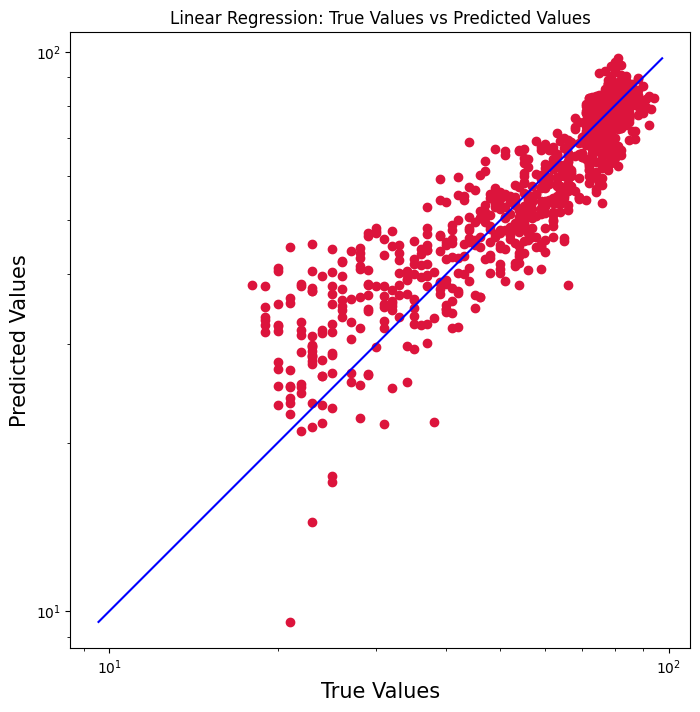

In [17]:
true_val = y_test
pred_val = model.predict(x_test)
plt.figure(figsize=(8,8))
plt.scatter(true_val, pred_val, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred_val), max(true_val))
p2 = min(min(pred_val), min(true_val))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Linear Regression: True Values vs Predicted Values")
plt.axis('equal')
plt.show()